### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\S Keerthana\Desktop\Career Foundry\Achivement 6\02 Data'

## Data

In [4]:
#Importing llisting data
df=pd.read_csv(os.path.join(path,'Prepared Data','newyork_final.csv'),index_col=False)

## 2. Data cleaning

In [5]:
df.columns

Index(['Listing_id', 'Host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'Room_type', 'Price_list', 'Rating',
       'Availability_365', 'location', 'D.Train', 'D.airport',
       'D.Statue_of_liberty'],
      dtype='object')

In [6]:
df.head(20)

,Listing_id,Host_id,neighbourhood_group,neighbourhood,latitude,longitude,Room_type,Price_list,Rating,Availability_365,location,D.Train,D.airport,D.Statue_of_liberty
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,0.21,365,"(40.64749, -73.97237)",11.699223,16.388641,7.652417
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,0.38,355,"(40.75362, -73.98377)",0.560817,21.443784,8.803805
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,0.00,365,"(40.80902, -73.9419)",6.920867,23.304873,15.879021
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,4.64,194,"(40.68514, -73.95976)",7.654630,16.105092,7.172440
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,0.10,0,"(40.79851, -73.94399)",5.801883,22.483763,14.812923
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,0.59,129,"(40.74767, -73.975)",0.597472,20.456315,8.754084
6,5121,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,0.40,0,"(40.68688, -73.95596)",7.535148,15.862788,7.483919
7,5178,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,3.47,220,"(40.76489, -73.98493)",1.494234,22.280375,9.797407
8,5203,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,0.99,0,"(40.80178, -73.96723)",5.506640,24.022556,14.103789
9,5238,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.33,188,"(40.71344, -73.99037)",4.507416,19.664608,5.305703


In [7]:
df.shape

(48895, 14)

### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Listing_id             0
Host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
Room_type              0
Price_list             0
Rating                 0
Availability_365       0
location               0
D.Train                0
D.airport              0
D.Statue_of_liberty    0
dtype: int64

### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(48895,)

### Extreme values checks

<AxesSubplot: xlabel='Rating', ylabel='Count'>

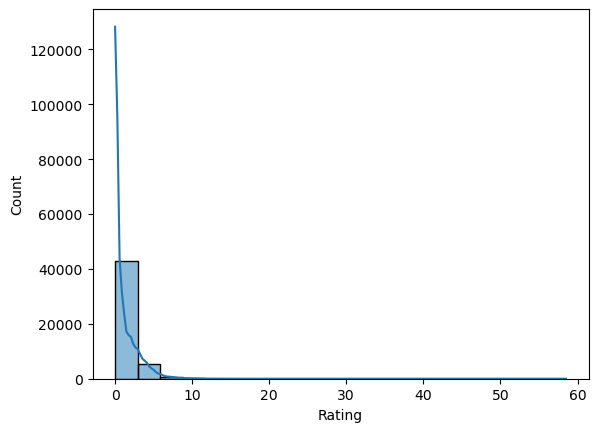

In [12]:
# Check the rating variable

sns.histplot(df['Rating'], bins=20, kde = True)

<AxesSubplot: xlabel='Price_list', ylabel='Count'>

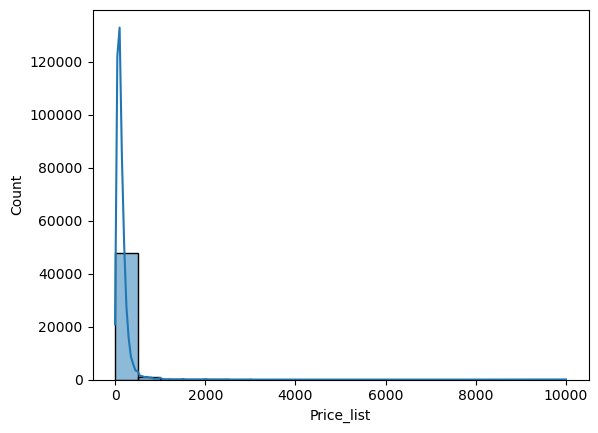

In [13]:
# Check the nieghbourhood variable

sns.histplot(df['Price_list'], bins=20, kde = True)

 **For the regression analysis, I am considering price and D.trainnumber of people.**

## 3. Data prep for regression analysis 

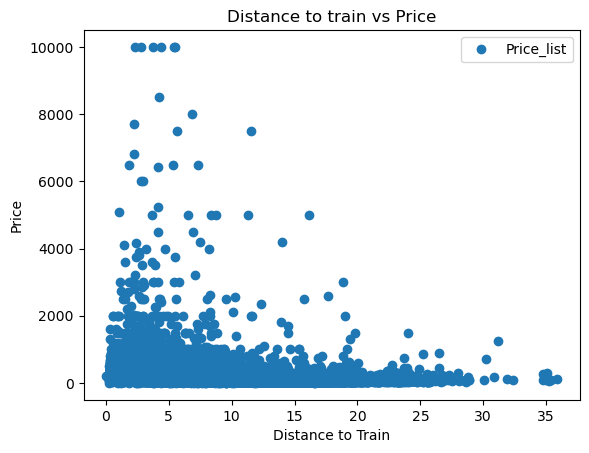

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'D.Train', y='Price_list',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to train vs Price')  
plt.xlabel('Distance to Train')  
plt.ylabel('Price')  
plt.show()

In [21]:
df_sub=df[df['Price_list'] < 50000.0]

In [22]:
df_sub.shape

(48895, 14)

In [23]:
df_sub.corr()

,Listing_id,Host_id,latitude,longitude,Price_list,Rating,Availability_365,D.Train,D.airport,D.Statue_of_liberty
Listing_id,1.000000,0.588290,-0.003125,0.090908,0.010619,0.180221,0.085468,0.068046,-0.048427,0.088322
Host_id,0.588290,1.000000,0.020224,0.127055,0.015309,0.209783,0.203492,0.099366,-0.041337,0.148134
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,-0.018758,-0.010983,-0.350352,0.690300,0.518957
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,0.138516,0.082731,0.516739,-0.585731,0.731519
Price_list,0.010619,0.015309,0.033939,-0.150019,1.000000,-0.050564,0.081829,-0.167241,0.107156,-0.122853
Rating,0.180221,0.209783,-0.018758,0.138516,-0.050564,1.000000,0.163732,0.118515,-0.093280,0.114137
Availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.163732,1.000000,0.092485,-0.035940,0.099253
D.Train,0.068046,0.099366,-0.350352,0.516739,-0.167241,0.118515,0.092485,1.000000,-0.380787,0.512551
D.airport,-0.048427,-0.041337,0.690300,-0.585731,0.107156,-0.093280,-0.035940,-0.380787,1.000000,0.049117
D.Statue_of_liberty,0.088322,0.148134,0.518957,0.731519,-0.122853,0.114137,0.099253,0.512551,0.049117,1.000000


In [24]:
#reshaping using Numpyarray for regression analysis

X=df_sub['D.Statue_of_liberty'].values.reshape(-1,1)
y=df_sub['Price_list'].values.reshape(-1,1)

In [25]:
X

array([[ 7.65241736],
       [ 8.8038053 ],
       [15.87902096],
       ...,
       [16.12156323],
       [ 8.82581861],
       [ 9.52949177]])

In [26]:
y

array([[149.],
       [225.],
       [150.],
       ...,
       [115.],
       [ 55.],
       [ 90.]])

In [27]:
#splitting data for test and train

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=0)

## 4.Regression Analysis

In [28]:
#create an object for linear regression

regression=LinearRegression()

In [29]:
#fit the regression object on train data set

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
#predict y values using X
y_predicted= regression.predict(X_test)

In [31]:
y_predicted

array([[188.18378417],
       [181.11274629],
       [164.88929634],
       ...,
       [141.2140323 ],
       [178.16685697],
       [180.78099548]])

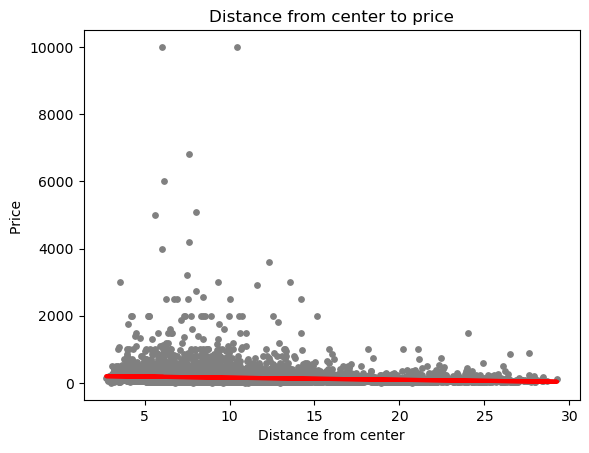

In [32]:
#plot predicted values in scatterpolt

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from center to price')
plot_test.xlabel('Distance from center')
plot_test.ylabel('Price ')
plot_test.show()

In [33]:
#create objects that contain summary of predicted values

rmse = mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test , y_predicted)

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.24203105]]
Mean squared error:  52160.925683612986
R2 score:  0.018185565259442815


In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data=pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,225.0,188.183784
1,649.0,181.112746
2,300.0,164.889296
3,26.0,179.364098
4,125.0,159.429984


In [36]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [37]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [38]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.24203105]]
Mean squared error:  58792.57904370817
R2 score:  0.013894757331757046


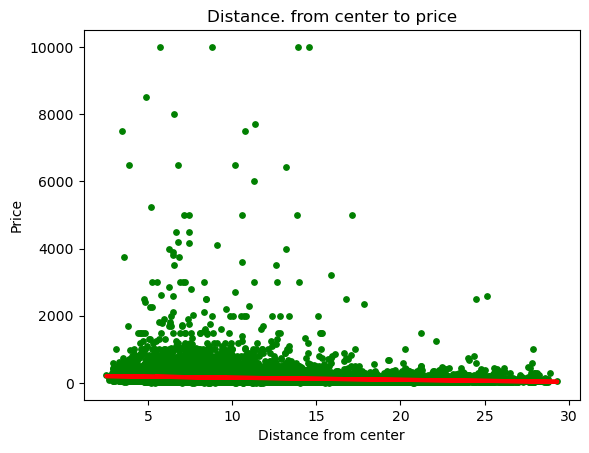

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance. from center to price')
plot_test.xlabel('Distance from center')
plot_test.ylabel('Price')
plot_test.show()

**From the R2(too low) and mean squared error(too high), we can understand that there is no linear relation between Distance and Price that can stay in the Airbnb to price. This model is not suitable for the data set we have here.**